In [22]:
#import package yang digunakan
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets, neighbors
from sklearn.preprocessing import LabelEncoder

In [23]:
cancer = pd.read_excel('cancer patient data sets.xlsx')
cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


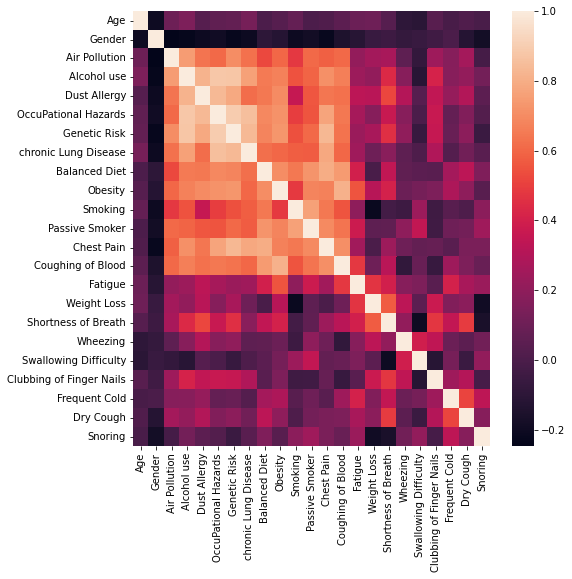

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(cancer.corr())

In [25]:

cancer = cancer.drop(['Patient Id','Age','Gender','Fatigue','Weight Loss','Shortness of Breath','Wheezing','Swallowing Difficulty','Clubbing of Finger Nails','Frequent Cold','Dry Cough','Snoring'],axis = 1)
cancer.head()

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Level
0,2,4,5,4,3,2,2,4,3,2,2,4,Low
1,3,1,5,3,4,2,2,2,2,4,2,3,Medium
2,4,5,6,5,5,4,6,7,2,3,4,8,High
3,7,7,7,7,6,7,7,7,7,7,7,8,High
4,6,8,7,7,7,6,7,7,8,7,7,9,High


In [26]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Air Pollution         1000 non-null   int64 
 1   Alcohol use           1000 non-null   int64 
 2   Dust Allergy          1000 non-null   int64 
 3   OccuPational Hazards  1000 non-null   int64 
 4   Genetic Risk          1000 non-null   int64 
 5   chronic Lung Disease  1000 non-null   int64 
 6   Balanced Diet         1000 non-null   int64 
 7   Obesity               1000 non-null   int64 
 8   Smoking               1000 non-null   int64 
 9   Passive Smoker        1000 non-null   int64 
 10  Chest Pain            1000 non-null   int64 
 11  Coughing of Blood     1000 non-null   int64 
 12  Level                 1000 non-null   object
dtypes: int64(12), object(1)
memory usage: 101.7+ KB


In [27]:
cancer.isnull().sum() #melihat apakah data yang missing

Air Pollution           0
Alcohol use             0
Dust Allergy            0
OccuPational Hazards    0
Genetic Risk            0
chronic Lung Disease    0
Balanced Diet           0
Obesity                 0
Smoking                 0
Passive Smoker          0
Chest Pain              0
Coughing of Blood       0
Level                   0
dtype: int64

In [28]:
cancer.describe()

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,4.195000,4.438000,4.859000
std,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,2.311778,2.280209,2.427965
min,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000
50%,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000
75%,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
max,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,9.000000,9.000000


In [29]:
#sns.pairplot(cancer,hue='Level',height=3,palette='colorblind')

#membagi variabel independen

In [30]:
X = cancer.drop(['Level'], axis = 1)
X.head()

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood
0,2,4,5,4,3,2,2,4,3,2,2,4
1,3,1,5,3,4,2,2,2,2,4,2,3
2,4,5,6,5,5,4,6,7,2,3,4,8
3,7,7,7,7,6,7,7,7,7,7,7,8
4,6,8,7,7,7,6,7,7,8,7,7,9


In [31]:
y = cancer['Level']
y.head()

0       Low
1    Medium
2      High
3      High
4      High
Name: Level, dtype: object

#membagi data training dan data testing

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2) #membagi data training dan data testing
#mengubah skala data dengan mengaktifkan package
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

#Menampilkan hubungan k value dengan mean error atau akurasi

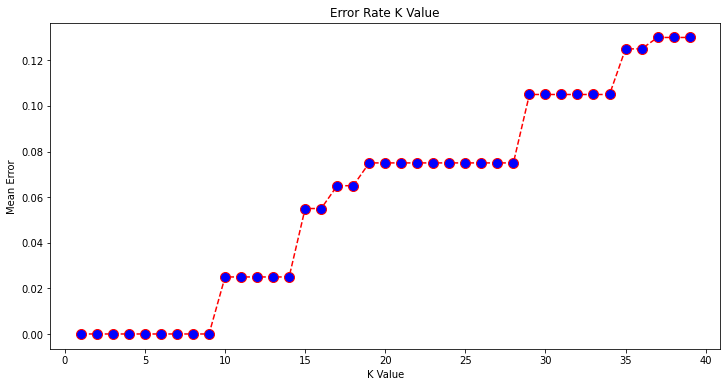

In [33]:
from sklearn.neighbors import KNeighborsClassifier#import package KNN
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed',marker='o',

markerfacecolor='blue', markersize=10)

plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [34]:
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(x_train, y_train) #Menginput data training pada fungsi klasifikasi.
y_pred = classifier.predict(x_test)

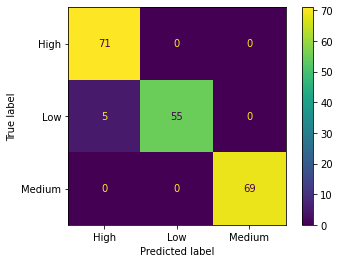

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm,display_labels=classifier.classes_).plot()

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.93      1.00      0.97        71
         Low       1.00      0.92      0.96        60
      Medium       1.00      1.00      1.00        69

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



In [37]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9750


In [38]:
X_test_frame = pd.DataFrame(X_test)
X_test_frame.reset_index(drop=True, inplace=True)
X_test_frame

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood
0,6,7,8,7,6,7,7,2,4,3,7,8
1,3,2,1,3,2,4,5,1,6,2,3,2
2,1,6,7,5,3,2,6,2,3,3,2,2
3,3,2,4,2,3,2,3,3,2,2,3,3
4,3,1,4,2,3,2,3,3,2,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,1,1,1,2,3,4,1,3,2,4,3
196,2,4,5,4,3,2,2,4,3,2,2,4
197,4,2,3,2,1,2,3,2,1,5,1,4
198,2,3,4,2,1,1,2,4,3,2,1,5


In [39]:
y_pred_frame=pd.DataFrame(y_pred)
y_pred_frame

,0
0,High
1,Low
2,Medium
3,Medium
4,Low
...,...
195,Low
196,Low
197,Low
198,Low


#model pengujian testing

In [40]:

test_model=pd.merge(X_test_frame,y_pred_frame,left_index=True,right_index=True)
test_model

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,0
0,6,7,8,7,6,7,7,2,4,3,7,8,High
1,3,2,1,3,2,4,5,1,6,2,3,2,Low
2,1,6,7,5,3,2,6,2,3,3,2,2,Medium
3,3,2,4,2,3,2,3,3,2,2,3,3,Medium
4,3,1,4,2,3,2,3,3,2,2,4,2,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,1,1,1,2,3,4,1,3,2,4,3,Low
196,2,4,5,4,3,2,2,4,3,2,2,4,Low
197,4,2,3,2,1,2,3,2,1,5,1,4,Low
198,2,3,4,2,1,1,2,4,3,2,1,5,Low
